# Part I: Data Preparation

## Read data from csv

In [110]:
import os
import pandas as pd
import numpy as np

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/Project2_DataFull.csv'

# read data using read_csv function

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [30]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df


import pandas as pd

def load_project2_data(project2_path=DATA_DIR):
    csv_path = os.path.join(project2_path, "Project2_DataFull.csv")
    return pd.read_csv(csv_path)

In [31]:
data = load_project2_data()
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetic          110527 non-null int64
Alcoholic         110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [91]:
data = pd.read_csv(CSV_FILE, 
                        dtype={ 'age': np.float64
                              },
                       parse_dates = ['ScheduledDay', 'AppointmentDay'])

data = data.rename(columns={'Hipertension': 'Hypertension', 'Diabetes': 'Diabetic', 'Alcoholism': 'Alcoholic', 
                                    'Handcap': 'Handicap'},)
data = data.drop(data[data['Age'] < 0].index)
data = data.drop(data[data['Handicap'] > 1].index)

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetic,Alcoholic,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hypertension      110327 non-null int64
Diabetic          110327 non-null int64
Alcoholic         110327 non-null int64
Handicap          110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [93]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetic,Alcoholic,Handicap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
data.to_csv(DATA_DIR + '/Project2_DataClean.csv', index=False)

In [95]:
def load_project2_data(project2_path=DATA_DIR):
    csv_path = os.path.join(project2_path, "Project2_DataClean.csv")
    return pd.read_csv(csv_path)
data_clean = load_project2_data()
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetic,Alcoholic,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


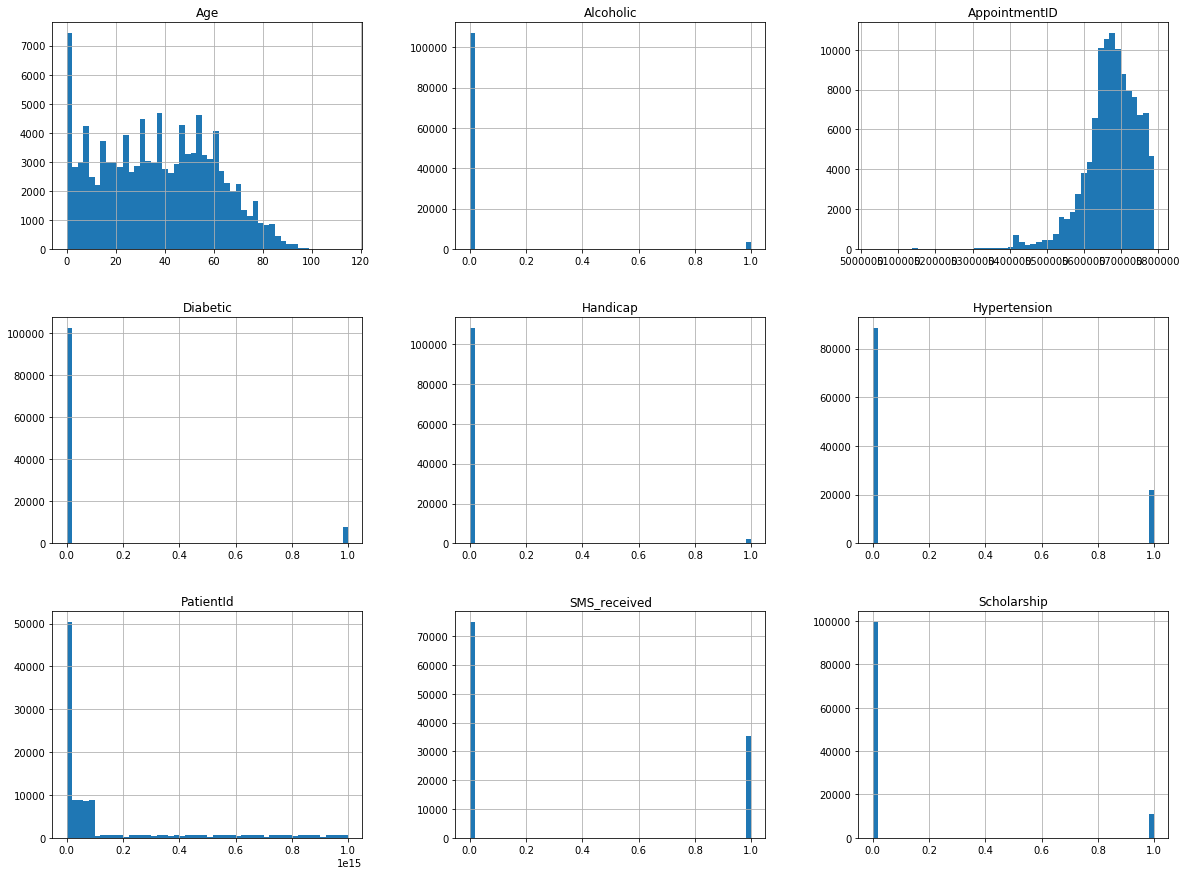

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
data_clean.hist(bins=50, figsize=(20,15))
plt.show()

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [97]:
data_clean['No-show'].value_counts() / len(data_clean)

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

No     0.798073
Yes    0.201927
Name: No-show, dtype: float64

In [98]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=1234)

for train_index, test_index in split.split(data_clean, data_clean['No-show']):
    train_set = data_clean.iloc[train_index]
    test_set = data_clean.iloc[test_index]

In [99]:
print("Train set:")
print(train_set['No-show'].value_counts() / len(train_set))

print("Test set:")
print(test_set['No-show'].value_counts() / len(test_set))

Train set:
No     0.798078
Yes    0.201922
Name: No-show, dtype: float64
Test set:
No     0.79805
Yes    0.20195
Name: No-show, dtype: float64


In [100]:
train_set.to_csv(DATA_DIR + '/train_data.csv', index=False)
test_set.to_csv(DATA_DIR + '/test_data.csv', index=False)

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

In [101]:
# Make plots here!
def load_project2_data(project2_path=DATA_DIR):
    csv_path = os.path.join(project2_path, "train_data.csv")
    return pd.read_csv(csv_path)
data_train = load_project2_data()

data_train = pd.read_csv(DATA_DIR + '/train_data.csv', 
                        dtype={ 'age': np.float64
                              },
                       parse_dates = ['ScheduledDay', 'AppointmentDay'])

data_train.shape

(90327, 14)

In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90327 entries, 0 to 90326
Data columns (total 14 columns):
PatientId         90327 non-null float64
AppointmentID     90327 non-null int64
Gender            90327 non-null object
ScheduledDay      90327 non-null datetime64[ns]
AppointmentDay    90327 non-null datetime64[ns]
Age               90327 non-null int64
Neighbourhood     90327 non-null object
Scholarship       90327 non-null int64
Hypertension      90327 non-null int64
Diabetic          90327 non-null int64
Alcoholic         90327 non-null int64
Handicap          90327 non-null int64
SMS_received      90327 non-null int64
No-show           90327 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 9.6+ MB


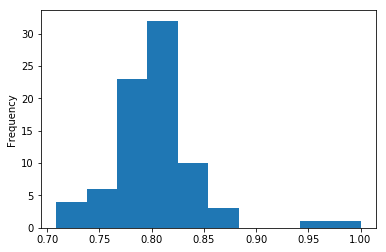

In [103]:
data_train.groupby('Neighbourhood')['No-show']\
             .value_counts(normalize=True)\
             .loc[:,'No']\
             .plot.hist()

In [104]:
columns = ['No-show', 'Scholarship', 'Hypertension', 'Diabetic',
           'Alcoholic', 'Handicap', 'SMS_received']
data_train[columns].groupby('No-show').mean()

,Scholarship,Hypertension,Diabetic,Alcoholic,Handicap,SMS_received
No-show,,,,,,
No,0.093566,0.203945,0.073480,0.030296,0.018921,0.291519
Yes,0.116344,0.167992,0.064532,0.030155,0.016174,0.437360


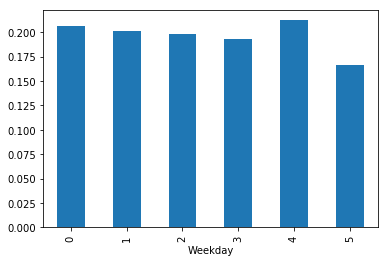

In [105]:
data_train['Weekday'] = data_train['AppointmentDay'].dt.weekday
data_train.groupby('Weekday')['No-show']\
    .value_counts(normalize=True)\
    .loc[:,'Yes']\
    .plot.bar()

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [111]:


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# create pipeline here!

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

# github.com/pandas-dev/sklearn-pandas
# install with pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

class WeekdayTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X['AppointmentDay'].dt.weekday.values

weekday_mapper = DataFrameMapper([
    (['AppointmentDay'], WeekdayTransform())
], input_df=True)
    

weekday_pipeline = Pipeline([
    ('weekday_adder', weekday_mapper),
    ('weekday_encoder', OneHotEncoder(n_values=7))
])


class DaysAheadTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        daysahead = (X['AppointmentDay'] - X['ScheduledDay'])\
            .dt.days\
            .values\
            .astype('float64')
        return daysahead
    
daysahead_mapper = DataFrameMapper([
    (['AppointmentDay', 'ScheduledDay'], DaysAheadTransform())
], input_df=True)

daysahead_pipeline = Pipeline([
    ('mapper', daysahead_mapper),
    ('scaler', StandardScaler())
])

date_pipeline = FeatureUnion(transformer_list=[
    ('weekday_pipeline', weekday_pipeline),
    ('daysahead_pipeline', daysahead_pipeline)
])

numeric_attributes = ['Scholarship',
                      'Hypertension',
                      'Diabetic',
                      'Alcoholic',
                      'Handicap'
                      'SMS_received'
                     ]

num_mapper = DataFrameMapper(list(zip(numeric_attributes, [None for x in numeric_attributes])))

df_mapper = DataFrameMapper([
    (['Age'], StandardScaler()),
    ('Gender', LabelBinarizer()),
    ('Neighbourhood', LabelBinarizer())
])


full_pipeline = FeatureUnion(transformer_list=[
    ('date_pipeline', date_pipeline),
    ('num_mapper', num_mapper),
    ('df_mapper', df_mapper)
])

# show the first 5 rows of the transformed training set

